In [ ]:
import pandas as pd
import geopandas as gpd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import cmocean as cmo
from osgeo import gdal
from matplotlib.colors import LightSource

import matplotlib.patheffects as path_effects
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from scipy.interpolate import griddata

plt.rc('axes', axisbelow=True)
%matplotlib inline

In [9]:
ds = gdal.Open('../data/usa_pd_2020_1km.tif')
channel = np.array(ds.GetRasterBand(1).ReadAsArray())
usa = channel[2400:5800,6100:13700].copy()

usa[usa==-99999] = np.nan

pusa = np.log((usa+1e-3)**2)
pvmin = np.nanmin(pusa)
pvmax = np.nanmax(pusa)

/Users/brennan/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in log
  import sys
/Users/brennan/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [70]:
ppusa = pusa[::20,::20]
df = pd.DataFrame(ppusa).unstack().reset_index()
df.columns=["X","Y","Z"]
df = df.dropna().reset_index().iloc[:,1:]
ppusa.shape

In [71]:
xx, yy = np.meshgrid(np.linspace(0,ppusa.shape[1]-1,ppusa.shape[1]),
                     np.linspace(0,ppusa.shape[0]-1,ppusa.shape[0]))
zz = ppusa.copy()

In [118]:
grid_x, grid_y = np.mgrid[0:339:340j, 0:759:760j]
pvs = []
points = []
values = []
for i in range(ppusa.shape[0]):
    for j in range(ppusa.shape[1]):
        vv = ppusa[i,j]
        if not np.isnan(ppusa[i,j]):
            points.append([i,j])
            values.append(ppusa[i,j])
            pvs.append(([i,j]+[0.0],[i,j]+[ppusa[i,j]+14]))

points = np.array(points)
values = np.array(values)

zi = griddata(points, values, (grid_x, grid_y), method='cubic')
zi = (ppusa/ppusa)*zi
# zi = zi - np.nanmin(zi)

/Users/brennan/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


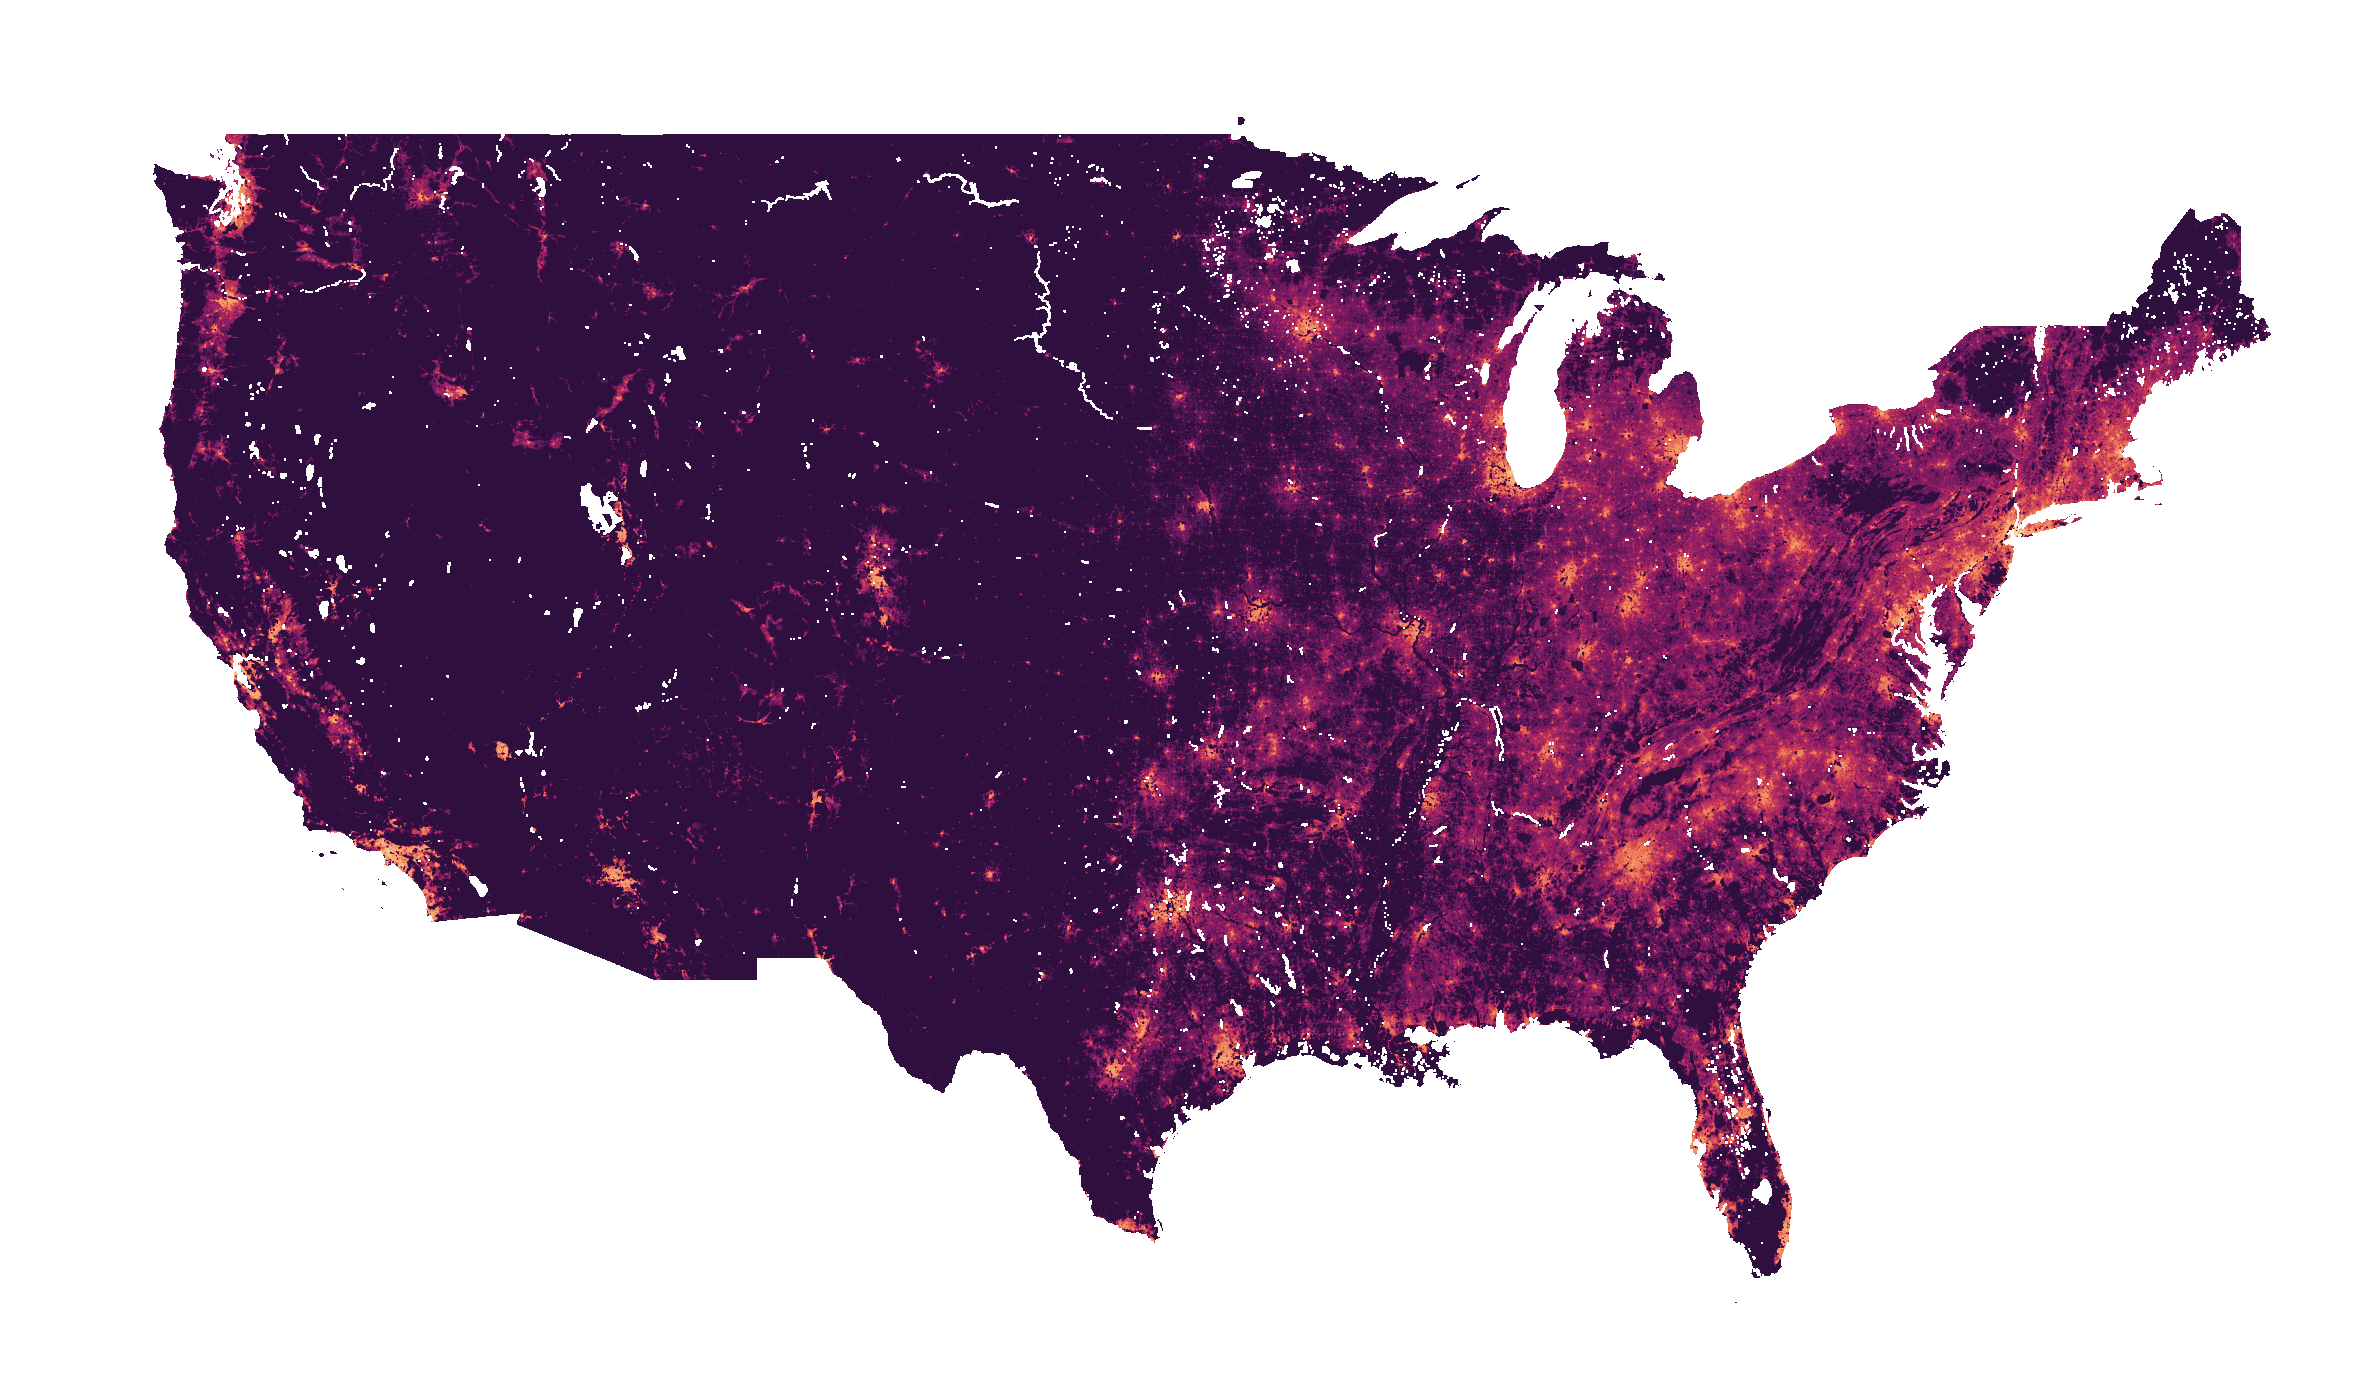

In [10]:
w = 15
h = 9
fig, ax = plt.subplots(1, 1, figsize=(w, h), dpi=200)

# usa_x = usa.copy()
# usa_x[usa_x>0] = 0
# usa_x[np.isnan(usa_x)] = 1
# ax.imshow(usa_x, cmap=plt.cm.Greys_r,aspect='auto', vmin=0, vmax=7.1)
ax.imshow(np.log(usa+1e-8),vmin=np.log(np.nanmin(usa+1)),vmax=np.log(np.nanmax(usa))*0.9,
          cmap=cmo.cm.matter_r,aspect='auto')
# ax.imshow(np.log(mex+1e-8),vmin=0,vmax=np.log(60000),cmap=plt.cm.YlGnBu,aspect='auto')
ax.set_axis_off()

plt.savefig('../figs/pngs/usa_hdx.png',dpi=425,bbox_inches='tight',transparent='True')
# plt.savefig('../figs/pdfs/usa_hd.pdf',bbox_inches='tight')
plt.show()

In [ ]:
ds = gdal.Open('../data/mex_pd_2020_1km.tif')
channel = np.array(ds.GetRasterBand(1).ReadAsArray())
mex = channel.copy()
mex[mex==-99999] = np.nan

In [ ]:
w = 15
h = 8.4
fig, ax = plt.subplots(1, 1, figsize=(w, h), dpi=200)

# usa_x = usa.copy()
# usa_x[usa_x>0] = 0
# usa_x[np.isnan(usa_x)] = 1
# ax.imshow(usa_x, cmap=plt.cm.Greys_r,aspect='auto', vmin=0, vmax=7.1)
ax.imshow(np.log(mex+1e-8),vmin=np.log(np.nanmin(mex+1)),vmax=np.log(np.nanmax(mex))*0.9,
          cmap=cmo.cm.matter_r,aspect='auto')
# ax.imshow(np.log(mex+1e-8),vmin=0,vmax=np.log(60000),cmap=plt.cm.YlGnBu,aspect='auto')
ax.set_axis_off()

plt.savefig('../figs/pngs/mex_hd.png',dpi=425,bbox_inches='tight',transparent='True')
# plt.savefig('../figs/pdfs/mex_hd.pdf',bbox_inches='tight')
plt.show()

/Users/brennan/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/brennan/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


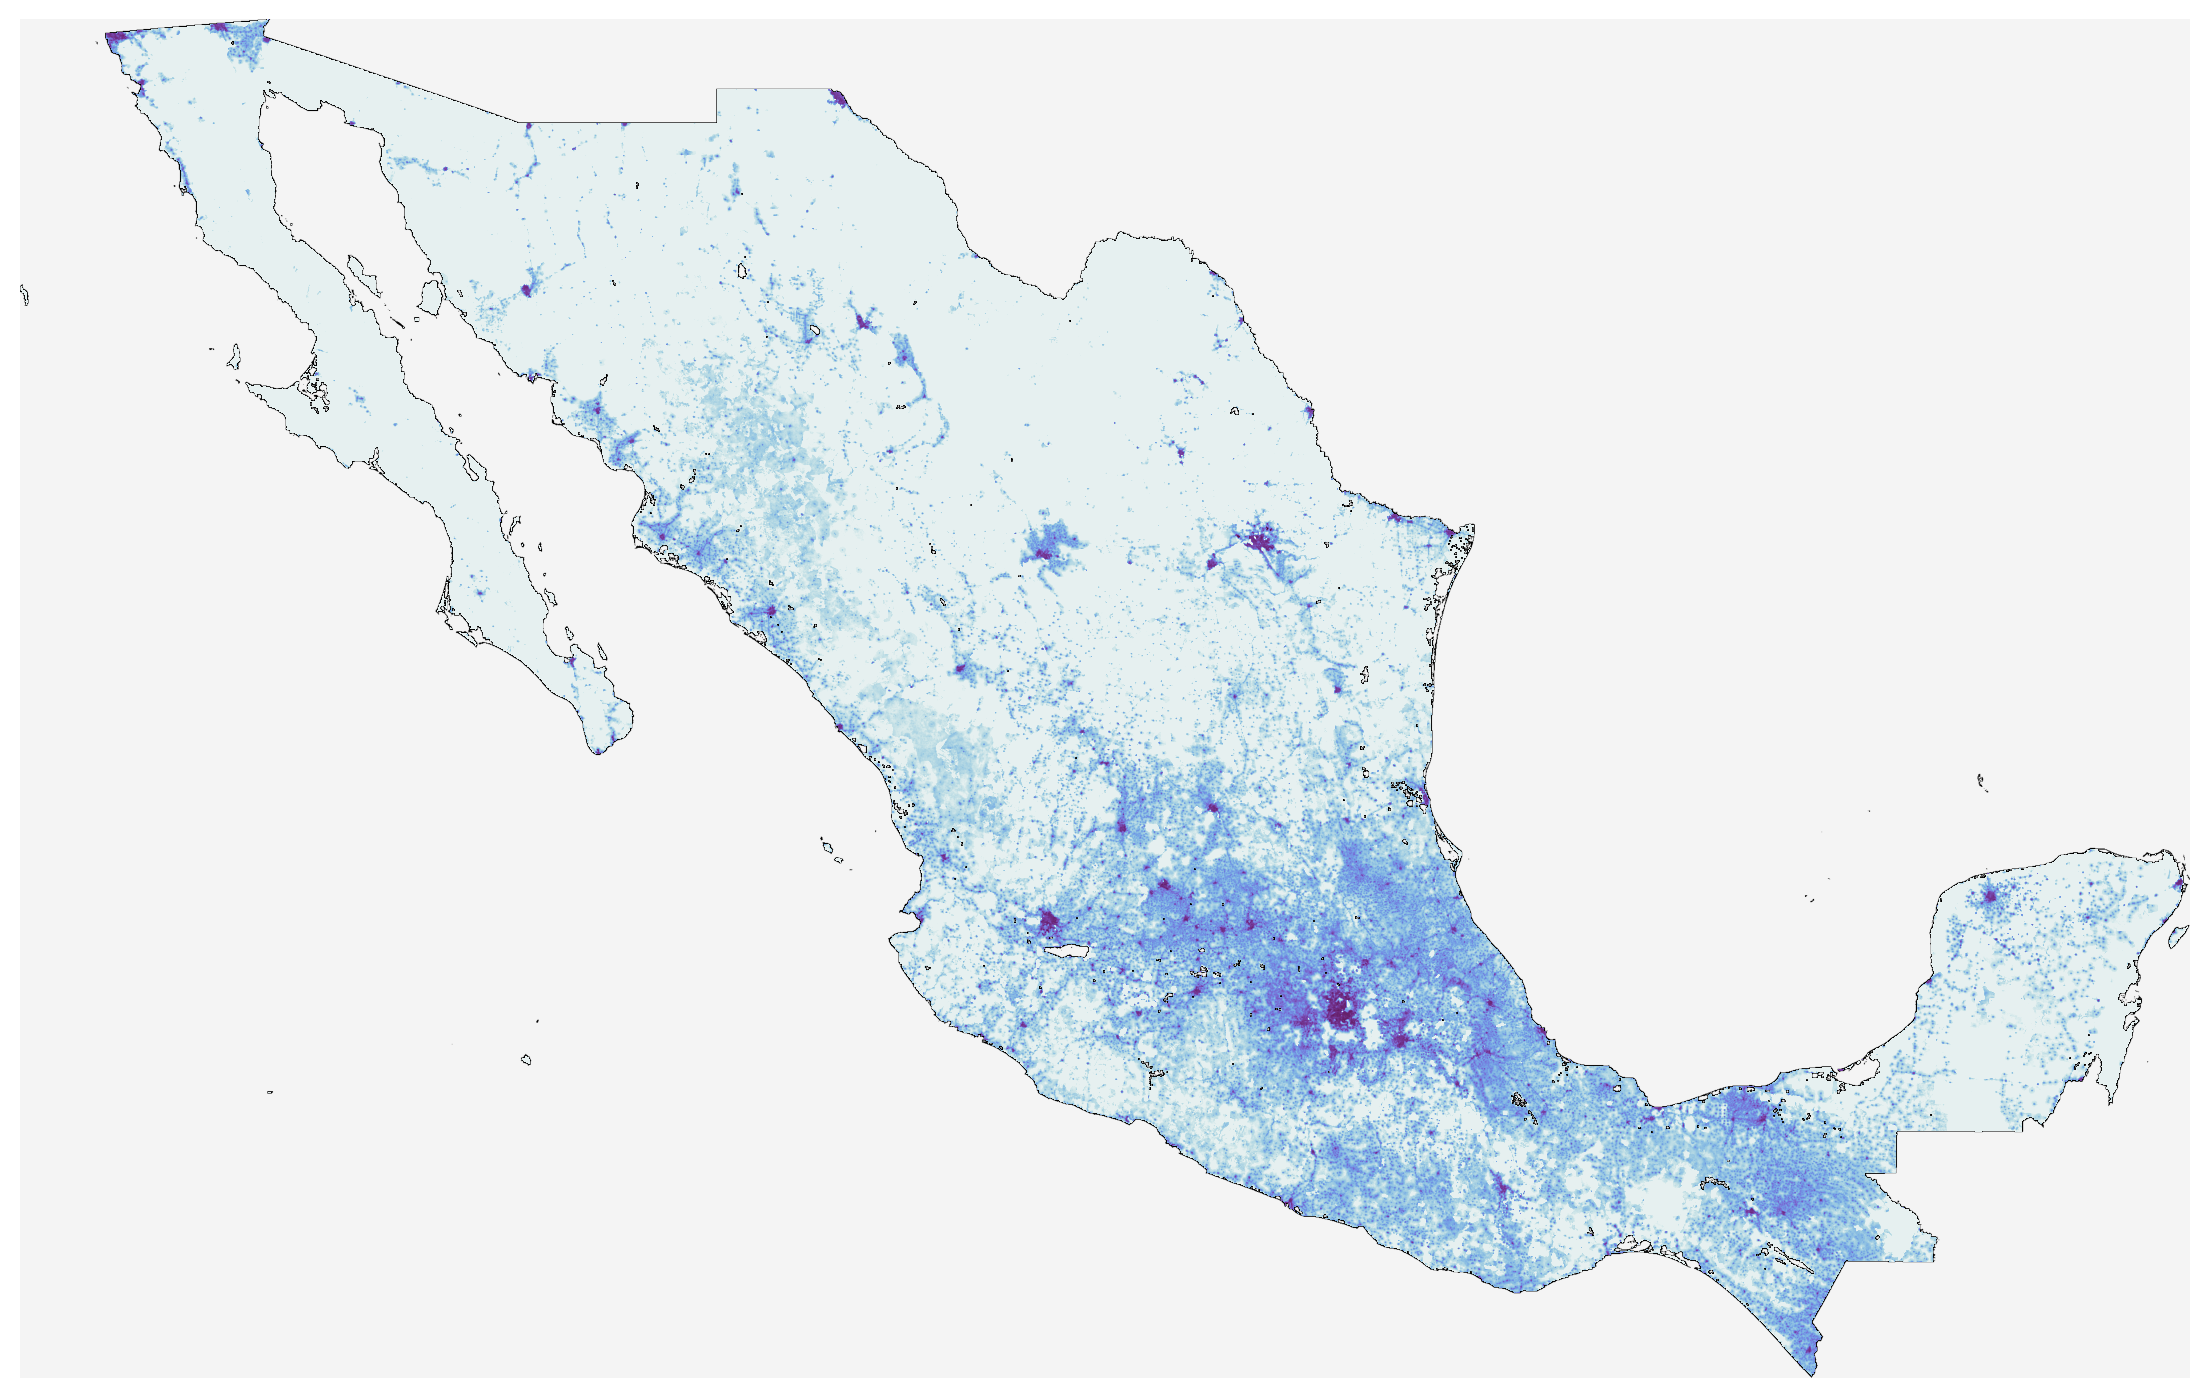

In [212]:
w = 14
h = 9
fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200)

mex_x = mex.copy()
mex_x[mex_x>0] = 0
mex_x[np.isnan(mex_x)] = 1
ax.imshow(mex_x, cmap=plt.cm.Greys_r,aspect='auto', vmin=0, vmax=1.1)

ax.imshow(np.log(mex+1e-8),vmin=np.log(np.nanmin(mex+1)),vmax=np.log(np.nanmax(mex))*0.9,
          cmap=cmo.cm.dense,aspect='auto')
# ax.imshow(np.log(mex+1e-8),vmin=0,vmax=np.log(60000),cmap=plt.cm.YlGnBu,aspect='auto')
ax.set_axis_off()

plt.savefig('../figs/pngs/mexico_hd3.png',dpi=600,bbox_inches='tight')
plt.show()